In [1]:
import random

import matplotlib.pyplot as plt

from base_rl.callbacks import SaveBestPolicy, SavePolicyOnTrainingEnd
from base_rl.scheduler import DecayingExpContinuousScheduler
from base_rl.train import ParallelTrainer, OnlineTrainer
from envs.env_creator import env_creator
from q_learning.algorithm import QLearningAlgo

In [2]:
plt.rcParams["figure.figsize"] = [20, 12]
fixed_digits = 6
experiment_id = random.randrange(111111, 999999, fixed_digits)


## Init Model and env

In [3]:
device = 'cuda'
steps_per_episode = 1000
#model_names = ['model_h_c', 'model_final_h', 'model_aeq']
model_names = [ 'model_h_c']



alpha


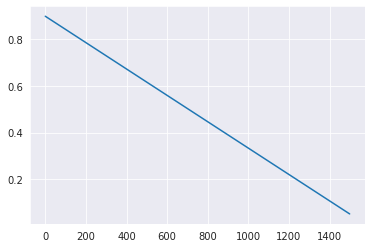

epsilon


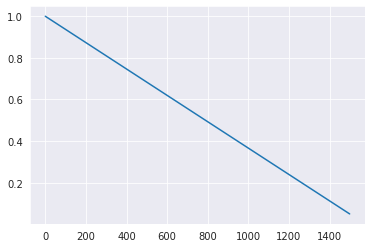

In [4]:
gamma = 0.995
total_epochs = 6000
print('alpha')
alpha = DecayingExpContinuousScheduler(start=0.9, decay=0.999)
print('epsilon')
epsilon = DecayingExpContinuousScheduler(start=1, decay=0.999)

In [5]:
best_save_paths = []
last_save_paths = []
x_interval_save_paths = []
models_env_kwargs = []
for model_name in model_names:
    env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device,
                  'model_path': f'tmp/state_quantization/{model_name}'}
    best_save_paths.append(f'tmp/q_learning/{experiment_id}/{model_name}/best_policy.pkl')
    last_save_paths.append(f'tmp/q_learning/{experiment_id}/{model_name}/last_save_policy.pkl')
    x_interval_save_paths.append(f'tmp/q_learning/{experiment_id}/{model_name}/x_interval_policy.pkl')
    models_env_kwargs.append(env_kwargs)


In [6]:

workers_kwargs = []
for i, model_name in enumerate(model_names):
    trainer_config = {
        'algo': QLearningAlgo(
            comment=f',id={experiment_id},model={model_name},gamma={gamma},total_epochs={total_epochs}',
            epochs=total_epochs, alpha=alpha, gamma=gamma, epsilon=epsilon, env_creator=env_creator,
            env_kwargs=models_env_kwargs[i], reward_offset=2000, show_reward_type='mean'
        ),
        'callbacks': [
            SaveBestPolicy(save_path=best_save_paths[i]),
            SavePolicyOnTrainingEnd(save_path=last_save_paths[i])
        ]
    }
    workers_kwargs.append(trainer_config)

parallel_trainer = ParallelTrainer(trainer_class=OnlineTrainer, workers_kwargs=workers_kwargs)
parallel_trainer.train()

/home/hamza/PycharmProjects/StateCompression/venv/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hamza/PycharmProjects/StateCompression/venv/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
